# PM2 - Data Exploration 

My data collection encompassed different parts given the fact that GetOldTweets3 no longer works to extract old tweets from Twitter. Thus this Jupyter notebook on data exploration will similarly also include some of the code I had written to explore data from GetOldTweets3 as well as the regular Twitter API. 

## Part 1 - Analyzing data from GetOldTweets3 calls

Although I was unable to store much data that I was exploring with GetOldTweets3. I have provided some of the code that I wrote and some images of sample output to show how the code allowed me to explore some of the older tweets. 

In the following I have included the from my data explorations of what accounts tweeted using the hashtag #vaccinesarepoison in the month of August 2019. First I show how I aquired all the relevant tweets and afterwards show who the top accounts were as well as the number of tweets they wrote pertaining to that hashtag in that one month period. 

In [ ]:
text_query = '#vaccinesarepoison'
since_date = '2019-09-01'
until_date = '2020-09-31'
count = 1000
# Creation of query object
# tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query).setSince(since_date).setUntil(until_date).setMaxTweets(count)
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query).setSince(since_date).setUntil(until_date)
# Creation of list that contains all tweets
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
# Creating list of chosen tweet data
text_tweets = [[tweet.id, tweet.date, tweet.text, tweet.username, tweet.favorites] for tweet in tweets]
# Creation of dataframe from tweets list
tweets_df = pd.DataFrame(text_tweets)

After having obtained the tweets in the corresponding time frame I decided to explore the users and the number of times they appeared in the search for the hashtag #vaccinesarepoison. In order to find which ones appeared the most I first created a dictionary that counted the frequency of each users appearance. 

userDic = dict()
for t in tweets:
    if t.username not in userDic.keys():
        userDic[t.username] = 1 
    else:
        current = userDic[t.username]
        userDic[t.username] = current +1

<img src="userDict.png">

To order the dictionary by frequency where the first entry is the username with the most tweets I sorted the dictionary entries and printed out the top ten users. 

In [ ]:
sorted_users = sorted(userDic.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
sorted_users

<img src="sortedAcc.png">

In [ ]:
import collections

# conversion back to a dictionary
sorted_dict = collections.OrderedDict(sorted_users)

In [ ]:
import itertools

# Initialize limit  
N = 10 
    
# Using islice() + items()  
# Get first N items in dictionary  
topAccounts = dict(itertools.islice(sorted_dict.items(), N)) 

In [ ]:
topAccounts

<img src="output1.png">

After having seen which accounts correspond to the accounts that posted the most in August 2019, I decided to find out more about the twitter behavior of these accounts in that time period. Thus I looked at the number of tweets in that one month period for each of the top accounts.

In [ ]:
since_date = '2019-09-01'
until_date = '2020-09-31'

for acc in topAccounts.keys():
    username = acc
    count = 100
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
                                        .setMaxTweets(count).setSince(since_date).setUntil(until_date)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data

    print (tweets)
    user_tweets = [[tweet.date, tweet.text] for tweet in tweets]
    print(user_tweets)
    # Creation of dataframe from tweets list
    #tweets_df = pd.DataFrame(user_tweets)

After GetOldTweets3 no longer was working and my old search queries were no longer useful, I decided to focus my attention to Tweepy, another Twitter library that uses the Twitter API, but would have the limitation of not allowing one to look at older Tweets. Due to this limitation I decided to focus my attention on tweets that expressed anti-vaccination sentiment within the last week. Inspired by what we had discussed in class on natural language processing and sentiment analysis I decided to perform my own sentiment analysis and measure the polarization of some of the Tweets. 

# Part 2 - exploring data collected via Tweepy

## 2.1 Reading in file

I collected tweets that used the words vaccines are poison. To learn more about these tweets I first read in the file containing the tweets.



In [47]:
fName = "tweets_1.txt"
with open(fName, 'r') as file:
    all_tweets = [line.strip() for line in file if line != '\n']

In [49]:
all_tweets[1] # check that we actually were able to get data from our stored file

'1. The Earth ISNT flat and there is more evidence pointing towards it being round than fla… https://t.co/6UhLWavQNR'

In [50]:
len(all_tweets) # number of tweets collected 

222

## 2.2 Import libraries and pre-process data

The current format of the Twitter data needs to be processed in order to perform sentiment analysis. 
First the URLs contained in some of the tweets need to be removed as well as getting rid of stopwords to perform frequency and sentiment analysis.

In [16]:
# import necessary libraries
import nltk
from nltk.corpus import stopwords
import re
import networkx

In [17]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing
    """
    #txt = re.sub('@[^\s]+','',txt
    print(" ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split()))
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [51]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5] # output of some tweets without the url 

Heres a trivia for ya
1 The Earth ISNT flat and there is more evidence pointing towards it being round than fla
HegKong All vaccines are pure poison Fraud that exist to cause amp spread diseases for profit There is No Profit in
Smokemeakipperi FormulaMoments craniosurgeon tnewtondunn Vaccines are poison Give me covid any day I think I
joewarmington HARRISFAULKNER because big pharma pays media to lie about vaccines they are poison and always have been
cfccouch sharrzam Scouserio EthelOrgana piersmorgan realDonaldTrump I dont hate any1 Says more about u if u
Frank38328140 marklevinshow Theres a reason why Bill Gates is banned from entering certain countries His vacci
Vaccines are poison amp bio weapons
Never take them
Just step away from the vaccines and viruses Gates Viruses in humans amp computers are not the same thing so quit tr
A VIRUS MUST BE INJECTED
VACCINES ARE POISON
DO NOT TAKE ANY INJECTION MARK OR TATTOO
Bill Gates is an Indus
KateShemirani Whats deadly is the poison youre f

['Heres a trivia for ya',
 '1 The Earth ISNT flat and there is more evidence pointing towards it being round than fla',
 'HegKong All vaccines are pure poison Fraud that exist to cause amp spread diseases for profit There is No Profit in',
 'Smokemeakipperi FormulaMoments craniosurgeon tnewtondunn Vaccines are poison Give me covid any day I think I',
 'joewarmington HARRISFAULKNER because big pharma pays media to lie about vaccines they are poison and always have been']

In [64]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls] # split the tweets up into single in words
words_in_tweet[5]

['cfccouch',
 'sharrzam',
 'scouserio',
 'ethelorgana',
 'piersmorgan',
 'realdonaldtrump',
 'i',
 'dont',
 'hate',
 'any1',
 'says',
 'more',
 'about',
 'u',
 'if',
 'u']

## 2.3 Removing stopwords

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andreamock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['as',
 'through',
 'their',
 'down',
 'those',
 "you're",
 'who',
 'very',
 'should',
 'until']

In [67]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [68]:
tweets_nsw[3] # entry with no stopwords

['smokemeakipperi',
 'formulamoments',
 'craniosurgeon',
 'tnewtondunn',
 'vaccines',
 'poison',
 'give',
 'covid',
 'day',
 'think']

In [69]:
all_words_nsw = list(itertools.chain(*tweets_nsw))
 
counts_nsw = collections.Counter(all_words_nsw) # count the frequency of the words not including stopwords

counts_nsw.most_common(15) # get a lost of the most common words in our twitter data 

[('vaccines', 99),
 ('poison', 86),
 ('realdonaldtrump', 26),
 ('gates', 14),
 ('vaccine', 13),
 ('dont', 11),
 ('bill', 11),
 ('amp', 10),
 ('thats', 10),
 ('people', 9),
 ('like', 8),
 ('know', 8),
 ('take', 7),
 ('piersmorgan', 6),
 ('im', 6)]

In [70]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])
clean_tweets_nsw.head() # visualization of the top words 

,words,count
0,vaccines,99
1,poison,86
2,realdonaldtrump,26
3,gates,14
4,vaccine,13


## 2.4 Plotting the word frequencies

To get a better sense of the language and words used in our Twitter data,
I used matplotlib.pyplot to plot the frequency of the words that came up in the tweets. 

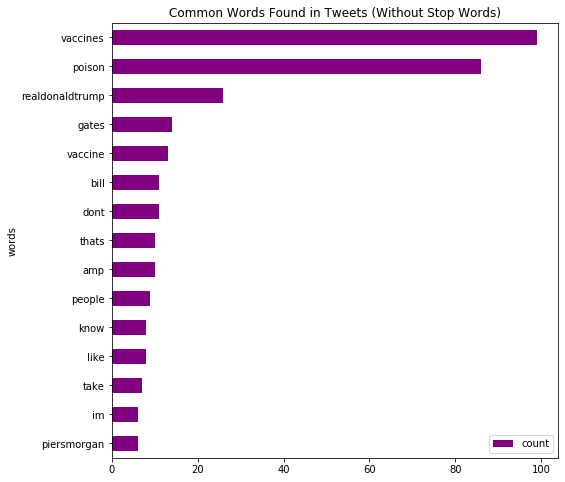

In [71]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

## 2.5 Sentiment analysis using TextBlob

Although we know how often particular words pop up in Tweets to get a better sense of what type of sentiment
each tweet is projecting we use the Python library TextBlob to perform our analysis.

In [72]:
from textblob import TextBlob

# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

In [73]:
sentiment_objects[5] # example of one of th textblob entries that will be analyzed

TextBlob("cfccouch sharrzam Scouserio EthelOrgana piersmorgan realDonaldTrump I dont hate any1 Says more about u if u")

In [74]:
sentiment_objects[5].sentiment_assessments

Sentiment(polarity=-0.15000000000000002, subjectivity=0.7, assessments=[(['hate'], -0.8, 0.9, None), (['more'], 0.5, 0.5, None)])

In [75]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

In [76]:
sentiment_values[5:10]

[[-0.15000000000000002,
  'cfccouch sharrzam Scouserio EthelOrgana piersmorgan realDonaldTrump I dont hate any1 Says more about u if u'],
 [0.21428571428571427,
  'Frank38328140 marklevinshow Theres a reason why Bill Gates is banned from entering certain countries His vacci'],
 [0.0, 'Vaccines are poison amp bio weapons'],
 [0.0, 'Never take them'],
 [0.0,
  'Just step away from the vaccines and viruses Gates Viruses in humans amp computers are not the same thing so quit tr']]

In [77]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.000000,Heres a trivia for ya
1,0.091667,1 The Earth ISNT flat and there is more eviden...
2,0.214286,HegKong All vaccines are pure poison Fraud tha...
3,0.000000,Smokemeakipperi FormulaMoments craniosurgeon t...
4,0.000000,joewarmington HARRISFAULKNER because big pharm...


## 2.7 Visualization of sentiment

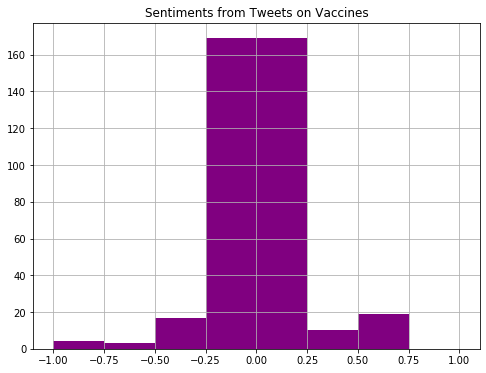

In [78]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Vaccines")
plt.show()

Looking at the visualization above showed that most Tweets were identified as neutral by Textblob despite some of them portraying very negative language or conspiracy theories.

# Part 3 - Analyzing more Twitter data

After collecting some initial data, and discovering that the performing sentiment analysis on crude data did not provide enough for an depth analysis, I decided to look for other ways to gather more information about the users as well as the Tweets being written on the topic of anti-vaccination. The additional Twitter data included account names, the number of followers, the tweets and since when the account was active. This wealth of information will allow us to answer a lot of different questions with regards to our data.

In [87]:
import pandas as pd
aids_data = pd.read_csv('vaccinescauseaids_twitter_data.csv') # importing csv file with all the user data on #vaccinescauseaids

In [88]:
aids_data.head() # see what our data frame looks like

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,AdamYoung329,"Married, Father to two boys, huskies Nekola an...","Welland, Ontario",535,296,8577,2011-10-14 23:22:07,2020-09-21 02:47:57,86,"If I thought COVID was fake, killed nobody, an...",[]
1,LandonCraigie,Extremely muscular. Live in a remote castle wi...,Canada,4994,1745,8619,2017-05-05 02:04:03,2020-09-21 02:42:17,86,"If I thought COVID was fake, killed nobody, an...",[]
2,drhoctor2,Everything that hasn't killed me has made me M...,"Southern Tier, NY",4740,3275,326202,2009-03-27 15:53:23,2020-09-21 00:11:58,86,"If I thought COVID was fake, killed nobody, an...",[]
3,DanaSmithTN04,Is some sanity really all that big of an ask?,NaN,161,113,1928,2020-08-19 23:45:18,2020-09-20 22:54:21,86,"If I thought COVID was fake, killed nobody, an...",[]
4,PersistentObsvr,“I despise Trump with the intensity of a thous...,"Indianapolis, IN",5001,2368,61303,2017-11-06 02:21:59,2020-09-20 21:08:11,86,"If I thought COVID was fake, killed nobody, an...",[]


In [91]:
aids_data.shape # tells us number of rows and columns

(186, 11)

## 3.1 Identifying top accounts

Similar to our first analysis done with the data collected using GetOldTweets, we want to identify the accounts that post the most with regards to the hashtag #vaccinescauseaids. To do so we create a frequency dictionary and identify the top ten accounts.

In [93]:
aids_data['username']

0         AdamYoung329
1        LandonCraigie
2            drhoctor2
3        DanaSmithTN04
4      PersistentObsvr
            ...       
181       PaulVCooper1
182       PaulVCooper1
183       PaulVCooper1
184            acape51
185        thommcg1980
Name: username, Length: 186, dtype: object

In [106]:
freqCount = aids_data['username'].value_counts() # counts the frequency of each username
freqCount

PaulVCooper1       8
jeremynewberger    4
LeftYvonne         2
kimbrdy            2
Lauriefirelily     2
                  ..
LuvTexasRoses      2
nomamao            2
alexpokerguy       2
jwharris           2
LilyGreenLily      2
Name: username, Length: 89, dtype: int64

In [108]:
freqDict = freqCount.to_dict() # creates a frequency dictionary
freqDict

{'PaulVCooper1': 8,
 'jeremynewberger': 4,
 'LeftYvonne': 2,
 'kimbrdy': 2,
 'Lauriefirelily': 2,
 'JSmithBlogger': 2,
 'shplangy': 2,
 'lindadean3': 2,
 'gartenrehn': 2,
 'caroline7eliza': 2,
 'yourexhubsnewgf': 2,
 'skyaswriter': 2,
 'IPFreel80094340': 2,
 'harlequingloryb': 2,
 'wmacghee': 2,
 'Andre_DElena': 2,
 'SarahSweetIowa': 2,
 'jneutron1969': 2,
 'BlownawayToo': 2,
 'sarah_wonson': 2,
 'tjsmith654': 2,
 'amf1708': 2,
 'DebbieDoesTwitt': 2,
 'LandonCraigie': 2,
 'TWakandaforever': 2,
 'drg_geemanone': 2,
 'sinpena14': 2,
 'Bruceb2The': 2,
 'sharitags': 2,
 'LaviniaHilltopp': 2,
 'FedorowMaya': 2,
 'DJHJamesDeanFan': 2,
 'Miss_Trendy11': 2,
 'DrewsKey1133': 2,
 'drhoctor2': 2,
 'AnonymousRex12': 2,
 'DanaSmithTN04': 2,
 'dmrichiephd': 2,
 'GoetzeSue': 2,
 'bjpluslj': 2,
 'JerseyGator71': 2,
 'A_GlobalCitizen': 2,
 'CindyDeetz': 2,
 'King_Of_Shade': 2,
 'earthwindskye': 2,
 'vvsSalvaje': 2,
 'deb_klipper': 2,
 'AdamYoung329': 2,
 'hlin_w': 2,
 'MaraFeiger': 2,
 'MIDNIGHT0521': 

In [109]:
import collections
import itertools

# conversion to a sorted dictionary
sorted_data = collections.OrderedDict(freqDict)


# Initialize limit  
N = 10 
    
# Using islice() + items()  
# Get first N items in dictionary  
topTweeters = dict(itertools.islice(sorted_data.items(), N)) 

In [110]:
topTweeters

{'PaulVCooper1': 8,
 'jeremynewberger': 4,
 'LeftYvonne': 2,
 'kimbrdy': 2,
 'Lauriefirelily': 2,
 'JSmithBlogger': 2,
 'shplangy': 2,
 'lindadean3': 2,
 'gartenrehn': 2,
 'caroline7eliza': 2}

## 3.2 Analyzing follower, following and tweets frequency

In addition to finding the top accounts we can also look at the number of followers and number of accounts each user is following. We can also look at the number of tweets of each user and plot these in a historgram for each of these. The following is code to visualize the three quantities we are interested in.

### 3.2.1 Plotting total tweet counts

In [135]:
tweetNum = aids_data['totaltweets'] # number of followers of each user
tweetNum

0        8577
1        8619
2      326202
3        1928
4       61303
        ...  
181     35301
182     35301
183     35301
184      1772
185     13366
Name: totaltweets, Length: 186, dtype: int64

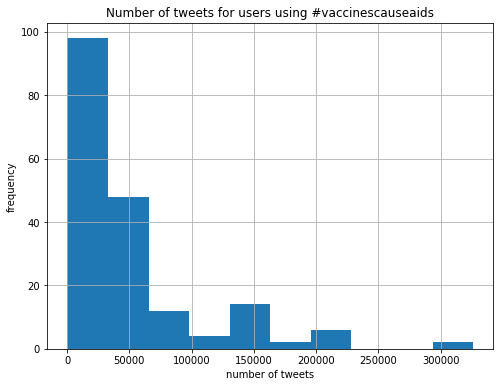

In [137]:
fig, ax = plt.subplots(figsize=(8, 6))

tweetNum.hist(label = "hist")
plt.title("Number of tweets for users using #vaccinescauseaids")
ax.set_xlabel("number of tweets")
ax.set_ylabel("frequency")
plt.show()

### 3.2.2 Plotting distribution of number of followers

With users engaging in antivaccination conversations the number of followers and people the users are following can give us a sense of the reach of these users. Thus the following two subsections explore the number of followers and number of accounts these users follow.

In [139]:
followerNum = aids_data['followers'] # number of followers of each user
followerNum 

0       296
1      1745
2      3275
3       113
4      2368
       ... 
181     305
182     305
183     305
184     110
185     102
Name: followers, Length: 186, dtype: int64

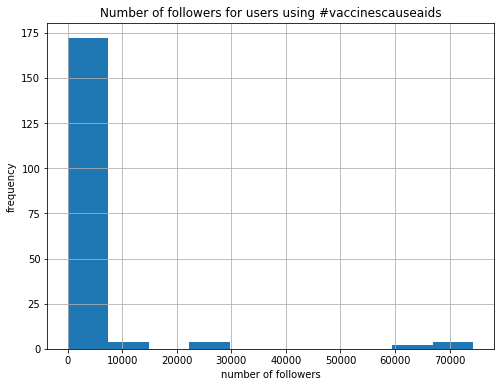

In [142]:
fig, ax = plt.subplots(figsize=(8, 6))

followerNum.hist(label = "hist")
plt.title("Number of followers for users using #vaccinescauseaids")
ax.set_xlabel("number of followers")
ax.set_ylabel("frequency")
plt.show()

### 3.2.2 Plotting distribution of number of accounts being followed

In [141]:
followingNum = aids_data['following'] # number of accounts each user follows
followingNum 

0       535
1      4994
2      4740
3       161
4      5001
       ... 
181     493
182     493
183     493
184     735
185      93
Name: following, Length: 186, dtype: int64

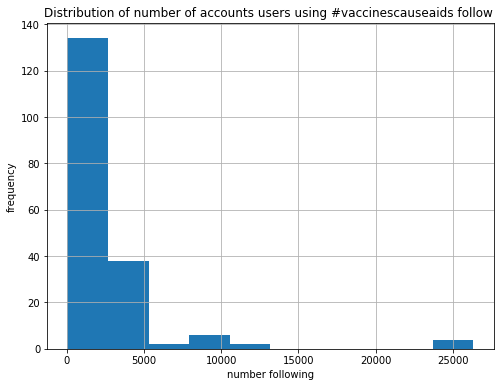

In [144]:
fig, ax = plt.subplots(figsize=(8, 6))

followingNum.hist(label = "hist")
plt.title("Distribution of number of accounts users using #vaccinescauseaids follow ")
ax.set_xlabel("number following")
ax.set_ylabel("frequency")
plt.show()